# SIMULACIÓN: LABORATORIO 1
### Entrega: martes 24 de agosto 2021, 23:59 horas


__INTEGRANTES:__

   * Claudia Arias
   * Andrés Gutiérrez
   * Esteban Tejeda

### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [2]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [5]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    plt.show()

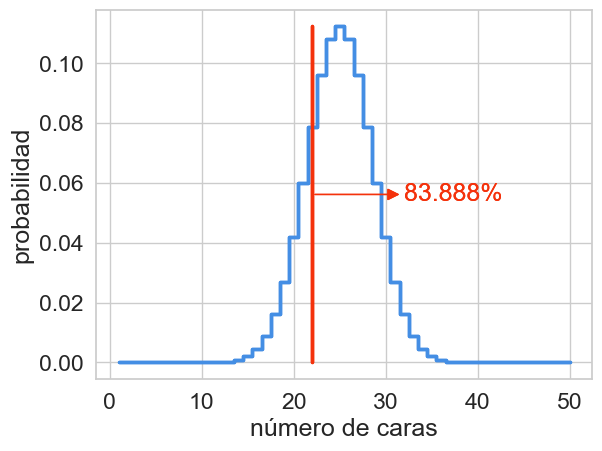

In [6]:
lanzaMoneda(22,50)


P-value simulado: 89.0%


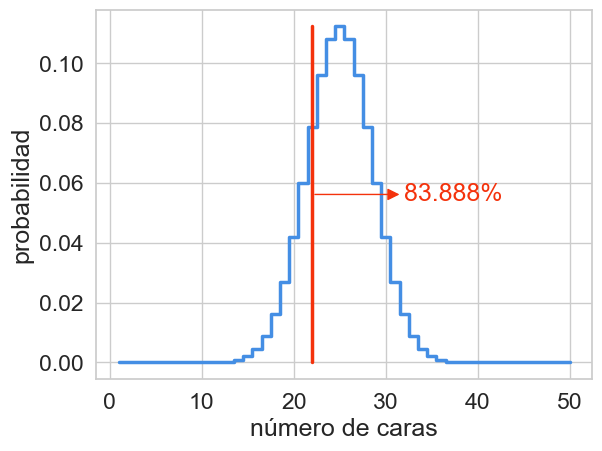

In [7]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 100  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

### Pregunta 3

__i) Demuestre _b_ y _c_ en la propiedad de Independencia.__



__(b)__ $A$ es independiente de $B^c$ 

* Demostración:

    $A = \Omega \cap A = (B \dot{\cup}B^c) \cap A = (B \cap A)\dot{\cup}(B^c \cap A)$

    Entonces:
    
    $P(A)=P(B \cap A)+P(B^c \cap A) = P(B)P(A)+ P(B^c \cap A)$
    
    De esta manera:
    
    $P(B^c \cap A)= (1-P(B))P(A)= P(B^c)P(A)$

__(c)__ $A^c$ es independiente de $B^c$ 

* Demostración:

    $A^c \cap B^c = \Omega - A \cup B$ 
    
    Entonces:
    
    $P(A^c \cap B^c) = 1 - P(A \cup B$) 
    
    Luego:
    
    $P(A^c \cap B^c) = 1 - [P(A)+P(B)-P(A \cap B)]=1 - [P(A)+P(B)-P(A)P(B)]$
    
    $P(A^c \cap B^c) = 1 - P(A)-P(B)+P(A)P(B)= [1-P(A)]-P(B)[1-P(A)]$
    
    $P(A^c \cap B^c) = [1-P(A)][1-P(B)]= P(A^c)P(B^c)$

__ii) Demuestre el Teorema de las Probabiliades totales.__


* Teorema de las Probabilidades Totales:

    $P(A) = \sum_{i=1}^n P(A | B_i)P(B_i)$

* Demostración:

    $A=(A \cap B_1) \cup (A \cap B_2) \cup (A \cap B_3) \cup ... \cup (A \cap B_n)$

    $P(A)=P(A \cap B_1) + P(A \cap B_2) + P|(A \cap B_3) \cup ... \cup P(A \cap B_n)$

    Por propiedades de conjunto se tiene:

    $P(A)= P(A | B_1)P(B_1)+P(A | B_2)P(B_2)+P(A | B_3)P(B_3)+...+P(A | B_n)P(B_n) = \sum_{i=1}^n P(A | B_i)P(B_i)$

# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.